In [415]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [416]:
fdi = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/pivot.csv', header = 1)

year = fdi.columns[1:]


fdi = pd.melt(fdi, id_vars='Host Country', value_vars= year )
fdi['Host Country'] = fdi['Host Country'].str.lstrip()
fdi = fdi.rename(columns = {0:'Year', 'value':'FDI'})
fdi['FDI'] = fdi['FDI'].str.replace(' ','')
fdi['FDI'] = fdi['FDI'].astype(float)
# fdi['Year'] = fdi['Year'].astype(float)
fdi['FDI'] = fdi['FDI'].apply(abs)
fdi = fdi[fdi['Host Country']!='Grand Total']
fdi

,Host Country,variable,FDI
0,Brunei Darussalam,2010,625.4
1,Cambodia,2010,782.6
2,Indonesia,2010,13770.2
3,Lao PDR,2010,332.6
4,Malaysia,2010,9155.9
...,...,...,...
115,Myanmar,2020,2205.6
116,Philippines,2020,6585.6
117,Singapore,2020,90597.7
118,Thailand,2020,4848.9


# Top 5 Countries

In [417]:
fdi_mean = fdi.groupby('Host Country')['FDI'].mean()
top_5_values = pd.DataFrame(fdi_mean.sort_values(ascending = False)[:5])
top_5 = top_5_values.index
top_5_values

,FDI
Host Country,
Singapore,71156.872727
Indonesia,17845.700000
Viet Nam,11627.918182
Malaysia,9389.827273
Thailand,8596.390909


C:\Users\pumad\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


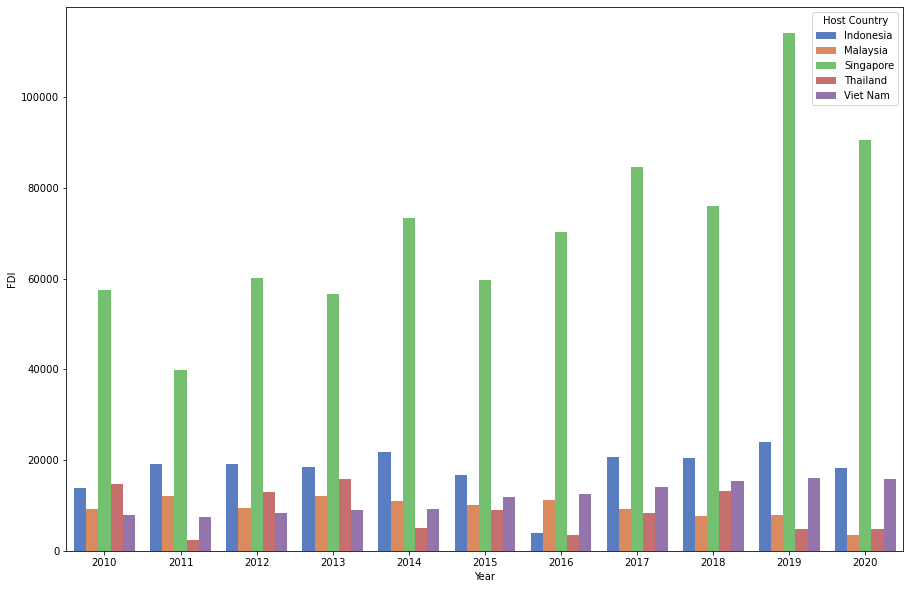

In [418]:
fdi_top5 = fdi[fdi['Host Country'].isin(top_5)]

fdi_top5.rename(columns = {'variable' : 'Year'}, inplace = True)

plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='FDI', hue = 'Host Country', data = fdi_top5, palette = 'muted' )
plt.show()

In [419]:
fdi_top5 = fdi_top5[fdi_top5['Year'].isin(['2020', '2010'])]

fdi_top5 = fdi_top5.groupby(['Host Country','Year'])['FDI'].aggregate('first').unstack()

fdi_top5['change'] = fdi_top5['2020'] - fdi_top5['2010']

fdi_top5 

# fdi_top5.pivot_table(values=fdi_top5['FDI'], index = fdi_top5['Host Country'], columns='Year')#, aggfunc='first')

Year,2010,2020,change
Host Country,,,
Indonesia,13770.2,18310.0,4539.8
Malaysia,9155.9,3511.8,-5644.1
Singapore,57460.6,90597.7,33137.1
Thailand,14746.7,4848.9,-9897.8
Viet Nam,8000.0,15800.0,7800.0


In [420]:
# fdi_top5 = fdi_top5.sort_values(['Host Country','Year'])
# # fdi_top5['year_before'] = fdi_top5.groupby('Host Country')['FDI'].shift()
# fdi_top5['diff'] = fdi_top5['FDI'] - fdi_top5['year_before']
# fdi_top5

# FDI by Province

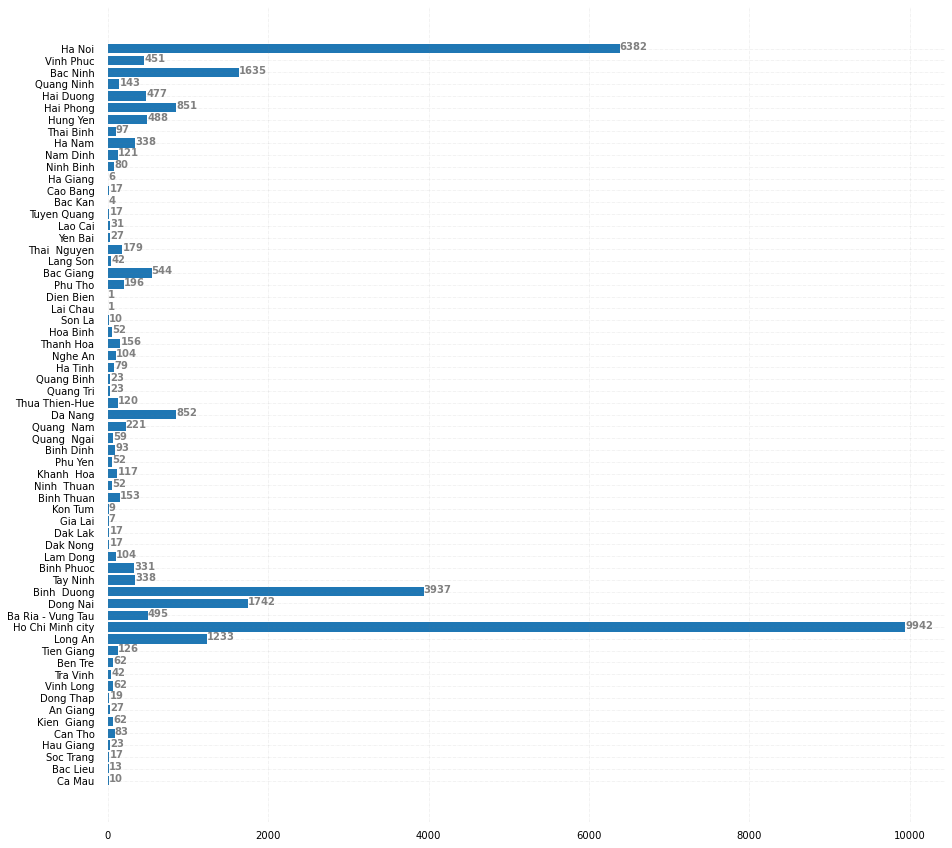

In [421]:
fdi_province = pd.read_excel('FDI_projects.xlsx',engine='openpyxl')

n = ['South East','Mekong River Delta', 'Central Highlands', 'Red River Delta', 'Northern midlands and mountain areas',  'North Central area and Central coastal area' ]

fdi_province = fdi_province[~fdi_province['City'].isin(n)]
 
name = fdi_province['City']
projects = fdi_province['Number of projects']
 
# Figure Size
fig, ax = plt.subplots(figsize =(15, 15))
 
# Horizontal Bar Plot
ax.barh(name, projects)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

In [422]:
fdi_province

,City,Number of projects
1,Ha Noi,6382
2,Vinh Phuc,451
3,Bac Ninh,1635
4,Quang Ninh,143
5,Hai Duong,477
...,...,...
64,Can Tho,83
65,Hau Giang,23
66,Soc Trang,17
67,Bac Lieu,13


# PCI Data

In [423]:


ENTRY_COST = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-entry-costs-ove.csv')

LAND_ACCESS = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-access-to-land.csv')

TRANSPARANCY = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-transparency-ov.csv')

TIME_COST = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-time-costs-over.csv')

INFORMAL_CHARGES = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-informal-charge.csv')

PROACTIVITY = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-proactivity-ove.csv')

BUSINESS_SUPPORT = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-business-suppor.csv')

LABOR_POLICY = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-labor-policy-ov.csv')

LAW = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/graph-of-law-amp-order-o.csv')

dic = {}
ls = []
for i, year in enumerate(range(2006, 2021)):
    ls.append(year)
    dic[i] = year


In [424]:

ENTRY_COST = ENTRY_COST.T
ENTRY_COST.rename(columns = dic, inplace = True)
ENTRY_COST = ENTRY_COST.iloc[1:,:]
ENTRY_COST = pd.melt(ENTRY_COST.reset_index(), id_vars=['index'], value_vars= ls)
ENTRY_COST.rename(columns = {'variable' : 'Year' , 'value' : 'ENTRY_COST' }, inplace = True)
ENTRY_COST.set_index('index', inplace = True)

LAND_ACCESS = LAND_ACCESS.T
LAND_ACCESS.rename(columns = dic, inplace = True)
LAND_ACCESS = LAND_ACCESS.iloc[1:,:]
LAND_ACCESS = pd.melt(LAND_ACCESS.reset_index(), id_vars=['index'], value_vars= ls)
LAND_ACCESS.rename(columns = {'variable' : 'Year' , 'value' : 'LAND_ACCESS' }, inplace = True)
LAND_ACCESS.set_index('index', inplace = True)

TRANSPARANCY = TRANSPARANCY.T
TRANSPARANCY.rename(columns = dic, inplace = True)
TRANSPARANCY = TRANSPARANCY.iloc[1:,:]
TRANSPARANCY = pd.melt(TRANSPARANCY.reset_index(), id_vars=['index'], value_vars= ls)
TRANSPARANCY.rename(columns = {'variable' : 'Year' , 'value' : 'TRANSPARANCY' }, inplace = True)
TRANSPARANCY.set_index('index', inplace = True)

TIME_COST = TIME_COST.T
TIME_COST.rename(columns = dic, inplace = True)
TIME_COST = TIME_COST.iloc[1:,:]
TIME_COST = pd.melt(TIME_COST.reset_index(), id_vars=['index'], value_vars= ls)
TIME_COST.rename(columns = {'variable' : 'Year' , 'value' : 'TIME_COST' }, inplace = True)
TIME_COST.set_index('index', inplace = True)

INFORMAL_CHARGES = INFORMAL_CHARGES.T
INFORMAL_CHARGES.rename(columns = dic, inplace = True)
INFORMAL_CHARGES = INFORMAL_CHARGES.iloc[1:,:]
INFORMAL_CHARGES = pd.melt(INFORMAL_CHARGES.reset_index(), id_vars=['index'], value_vars= ls)
INFORMAL_CHARGES.rename(columns = {'variable' : 'Year' , 'value' : 'INFORMAL_CHARGES' }, inplace = True)
INFORMAL_CHARGES.set_index('index', inplace = True)

PROACTIVITY = PROACTIVITY.T
PROACTIVITY.rename(columns = dic, inplace = True)
PROACTIVITY = PROACTIVITY.iloc[1:,:]
PROACTIVITY = pd.melt(PROACTIVITY.reset_index(), id_vars=['index'], value_vars= ls)
PROACTIVITY.rename(columns = {'variable' : 'Year' , 'value' : 'PROACTIVITY' }, inplace = True)
PROACTIVITY.set_index('index', inplace = True)

BUSINESS_SUPPORT = BUSINESS_SUPPORT.T
BUSINESS_SUPPORT.rename(columns = dic, inplace = True)
BUSINESS_SUPPORT = BUSINESS_SUPPORT.iloc[1:,:]
BUSINESS_SUPPORT = pd.melt(BUSINESS_SUPPORT.reset_index(), id_vars=['index'], value_vars= ls)
BUSINESS_SUPPORT.rename(columns = {'variable' : 'Year' , 'value' : 'BUSINESS_SUPPORT' }, inplace = True)
BUSINESS_SUPPORT.set_index('index', inplace = True)

LABOR_POLICY = LABOR_POLICY.T
LABOR_POLICY.rename(columns = dic, inplace = True)
LABOR_POLICY = LABOR_POLICY.iloc[1:,:]
LABOR_POLICY = pd.melt(LABOR_POLICY.reset_index(), id_vars=['index'], value_vars= ls)
LABOR_POLICY.rename(columns = {'variable' : 'Year' , 'value' : 'LABOR_POLICY' }, inplace = True)
LABOR_POLICY.set_index('index', inplace = True)

LAW = LAW.T
LAW.rename(columns = dic, inplace = True)
LAW = LAW.iloc[1:,:]
LAW = pd.melt(LAW.reset_index(), id_vars=['index'], value_vars= ls)
LAW.rename(columns = {'variable' : 'Year' , 'value' : 'LAW' }, inplace = True)
LAW.set_index('index', inplace = True)


In [425]:
df = pd.concat((ENTRY_COST, LAND_ACCESS['LAND_ACCESS'], TRANSPARANCY['TRANSPARANCY'], TIME_COST['TIME_COST'], INFORMAL_CHARGES['INFORMAL_CHARGES'], PROACTIVITY['PROACTIVITY'], BUSINESS_SUPPORT['BUSINESS_SUPPORT'], LABOR_POLICY['LABOR_POLICY'], LAW['LAW']), axis = 1)
df = df[df['Year'].isin(range(2010,2021))]


In [426]:
# Weight of each variable
W_Entry_Costs = 5
W_Land_Access = 5
W_Transparency = 20
W_Time_Cost = 5
W_Informal_Charges = 10
W_Proactivity = 5
W_Business = 20
W_Labor = 20
W_Legal = 5


In [427]:
df['ENTRY_COST'] = df['ENTRY_COST'] * W_Entry_Costs/10
df['LAND_ACCESS'] = df['LAND_ACCESS'] * W_Land_Access/10
df['TRANSPARANCY'] = df['TRANSPARANCY'] * W_Transparency/10
df['TIME_COST'] = df['TIME_COST'] * W_Time_Cost/10
df['INFORMAL_CHARGES'] = df['INFORMAL_CHARGES'] * W_Informal_Charges/10
df['PROACTIVITY'] = df['PROACTIVITY'] * W_Proactivity/10
df['BUSINESS_SUPPORT'] = df['BUSINESS_SUPPORT'] * W_Business/10
df['LABOR_POLICY'] = df['LABOR_POLICY'] * W_Labor/10
df['LAW'] = df['LAW'] * W_Legal/10


In [428]:
df['PCI INDEX'] = df.iloc[:,1:].sum(axis = 1)

In [429]:
df.reset_index(inplace = True)
df.rename(columns = {'index':'Province'}, inplace = True)
df.head()

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490


In [430]:
# Maket size, population, labor quality of 63 Vietnam local government 
path = 'C:/Users/pumad/STA141C/FinalProject/'

Viet_MKS = pd.read_csv(path + "Marketsize.csv", sep=",")

Viet_LAQU = pd.read_csv(path + "Labor_quality.csv", sep=" ")

Viet_POP = pd.read_csv(path + "Population_and_Employment.csv", sep=",")

Viet_POP.dropna(axis=0, inplace=True)


In [431]:
Viet_MKS_mt = pd.melt(Viet_MKS, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
Viet_MKS_mt.rename(columns={"variable" : "Year", "value" : "MKS_value"}, inplace=True)


Viet_LAQU_mt = pd.melt(Viet_LAQU, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
Viet_LAQU_mt.rename(columns={"variable" : "Year", "value" : "LAQU_value"}, inplace=True)

Viet_POP1 = Viet_POP.iloc[:, 0:12]
Viet_POP1.rename(columns={"Total 2010" : "2010", "Total 2011":"2011", "Total 2012" : "2012", "Total 2013" : "2013", "Total 2014" : "2014", "Total 2015": "2015", "Total 2016" : "2016" , "Total 2017" : "2017", "Total 2018" : "2018", "Total 2019" : "2019", "Total 2020" : "2020" }, inplace=True)
Viet_POP1_mt = pd.melt(Viet_POP1, id_vars=['Cities, provincies'], value_vars=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])

Viet_POP1_mt.rename(columns={"variable" : "Year", "value" : "POP_value"}, inplace=True)


df2 = Viet_MKS_mt.merge(Viet_LAQU_mt, how="inner")
df2 = df2.merge(Viet_POP1_mt, how="inner")

df2.rename(columns = {'Cities, provincies' : 'Province'}, inplace = True)



In [432]:
df['Year'] = df['Year'].astype(str)
df2['Year'] = df2['Year'].astype(str)
final = pd.merge(df, df2, how = 'inner', on = ['Province', 'Year'] )

In [433]:
final = pd.merge(df, df2, how = 'inner', on = ['Province', 'Year'] )

In [434]:
final.head()

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360,51086.9,1240.0,2122.44
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680,7316.9,984.8,1569.14
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305,1832.5,194.5,296.62
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870,4007.4,337.2,512.54
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490,13982.7,483.9,861.84


# FDI

In [435]:
FDI = pd.read_csv('C:/Users/pumad/STA141C/FinalProject/Yearly_FID_by_province.csv')
FDI['Province'] = FDI['Province'].str.strip()
for i in range(2010,2021):
    i = str(i)
    FDI[i] = FDI[i].str.replace(',','.')
    FDI[i] = FDI[i].astype(float)
FDI = FDI.fillna(0)

Year = [str(i) for i in range(2010,2021)]

FDI = FDI.melt(id_vars = ['Province'], value_vars = Year)
FDI.rename(columns = {'variable' : 'Year', 'value' : 'FDI'}, inplace = True)
FDI.head()

,Province,Year,FDI
0,Ha Noi,2010,557.4
1,Vinh Phuc,2010,248.1
2,Bac Ninh,2010,285.3
3,Quang Ninh,2010,2213.7
4,Hai Duong,2010,166.4


In [436]:
final = pd.merge(final, FDI , how = 'left', on = ['Province', 'Year'] )
final

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value,FDI
0,An Giang,2010,3.460,3.820,12.68,3.165,6.24,3.495,10.28,10.98,2.240,56.360,51086.90,1240.00,2122.44,65.4
1,Bac Giang,2010,3.220,2.400,12.22,2.915,6.43,2.750,12.60,10.72,2.425,55.680,7316.90,984.80,1569.14,163.1
2,Bac Kan,2010,3.140,3.165,10.54,2.805,4.86,2.280,10.46,9.30,1.755,48.305,1832.50,194.50,296.62,0.3
3,Cao Bang,2010,3.735,2.255,10.34,2.765,5.83,2.330,9.24,11.02,1.355,48.870,4007.40,337.20,512.54,0.0
4,Bac Lieu,2010,3.135,3.815,9.74,3.145,7.72,3.050,10.38,10.00,2.505,53.490,13982.70,483.90,861.84,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Tien Giang,2020,4.115,3.345,11.46,3.785,6.56,2.910,13.58,10.98,2.995,59.730,73814.63,1112.13,1772.54,167.2
689,Tra Vinh,2020,4.305,3.805,11.44,4.380,7.48,3.405,9.74,10.48,3.530,58.565,29427.84,561.34,1009.94,84.1
690,TT-Hue,2020,3.545,3.165,12.72,4.035,6.97,3.260,11.00,13.04,3.495,61.230,40157.85,583.70,1133.71,42.2
691,Vinh Long,2020,4.050,3.575,12.22,4.165,7.71,3.450,14.44,13.22,3.275,66.105,54833.90,603.60,1022.97,239.8


## Model

In [437]:
import scipy.linalg as sl
from sklearn.linear_model import LinearRegression

### Data scaling


In [438]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_columns = ["PCI INDEX", "MKS_value","POP_value", "LAQU_value", "ENTRY_COST",  "LAND_ACCESS", "TRANSPARANCY", "TIME_COST", "INFORMAL_CHARGES", "PROACTIVITY", "BUSINESS_SUPPORT" , "LABOR_POLICY", "LAW"]

final[scale_columns] = scaler.fit_transform(final[scale_columns])

# final.columns

In [439]:
final

,Province,Year,ENTRY_COST,LAND_ACCESS,TRANSPARANCY,TIME_COST,INFORMAL_CHARGES,PROACTIVITY,BUSINESS_SUPPORT,LABOR_POLICY,LAW,PCI INDEX,MKS_value,LAQU_value,POP_value,FDI
0,An Giang,2010,-1.204652,1.575305,0.490889,-0.303806,0.245293,1.454487,-0.304626,-0.347879,-1.049988,-0.049277,-0.016861,0.546687,0.500089,65.4
1,Bac Giang,2010,-1.790596,-1.860601,0.101815,-0.832236,0.429841,0.154209,0.710684,-0.489703,-0.720488,-0.187068,-0.428526,0.185225,0.079415,163.1
2,Bac Kan,2010,-1.985910,-0.009567,-1.319150,-1.064746,-1.095108,-0.666100,-0.225852,-1.264284,-1.913810,-1.681491,-0.480107,-0.934148,-0.888081,0.3
3,Cao Bang,2010,-0.533258,-2.211450,-1.488313,-1.149295,-0.152942,-0.578833,-0.759765,-0.326060,-2.626241,-1.567003,-0.459652,-0.732029,-0.723917,0.0
4,Bac Lieu,2010,-1.998118,1.563207,-1.995800,-0.346080,1.682824,0.677811,-0.260862,-0.882448,-0.578002,-0.630835,-0.365833,-0.524245,-0.458345,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,Tien Giang,2020,0.394487,0.425970,-0.541003,1.006703,0.556111,0.433464,1.139565,-0.347879,0.294726,0.633598,0.196897,0.365574,0.234060,167.2
689,Tra Vinh,2020,0.858359,1.539010,-0.557919,2.264368,1.449711,1.297407,-0.540948,-0.620618,1.247602,0.397530,-0.220568,-0.414560,-0.345744,84.1
690,TT-Hue,2020,-0.997130,-0.009567,0.524721,1.535133,0.954346,1.044333,0.010470,0.775808,1.185265,0.937549,-0.119651,-0.382889,-0.251642,42.2
691,Vinh Long,2020,0.235794,0.982490,0.101815,1.809917,1.673111,1.375947,1.515930,0.873995,0.793428,1.925388,0.018380,-0.354703,-0.335838,239.8


### QR

In [440]:
A = np.array(final.iloc[:,2:-1])

# add column of one for intercept
ncol = np.array(np.repeat(1, len(A)))
ncol = ncol.reshape(-1,1)
# ncol.shape



# print(np.array_str(An, precision=5, suppress_small=True))


An = np.hstack((ncol, A))

An

array([[ 1.00000000e+00, -1.20465173e+00,  1.57530521e+00, ...,
        -1.68611720e-02,  5.46687305e-01,  5.00088863e-01],
       [ 1.00000000e+00, -1.79059569e+00, -1.86060069e+00, ...,
        -4.28525516e-01,  1.85224626e-01,  7.94151482e-02],
       [ 1.00000000e+00, -1.98591034e+00, -9.56687823e-03, ...,
        -4.80107237e-01, -9.34148238e-01, -8.88081176e-01],
       ...,
       [ 1.00000000e+00, -9.97129916e-01, -9.56687823e-03, ...,
        -1.19650758e-01, -3.82889325e-01, -2.51642064e-01],
       [ 1.00000000e+00,  2.35793825e-01,  9.82490461e-01, ...,
         1.83800045e-02, -3.54703168e-01, -3.35837631e-01],
       [ 1.00000000e+00,  5.16558637e-01, -6.50774671e-01, ...,
        -1.23777183e-03, -3.10979214e-01, -2.23115627e-01]])

In [441]:
q, r = sl.qr(An)

p = np.dot(q.T, np.array(b))
xhat_qr = np.dot(np.linalg.pinv(r), p)


print("The regression coefficient xhat_qr is : ")
print(xhat_qr[1:])
print("The intercept is :")
print(xhat_qr[0])

The regression coefficient xhat_qr is : 
[[ -67.7533911 ]
 [ -87.69547232]
 [  40.6637357 ]
 [ 131.71702491]
 [-210.74872145]
 [-260.75515103]
 [-277.71477944]
 [ 484.95230565]
 [ -42.39629832]
 [ -18.10046805]
 [ 601.56346591]
 [ 708.28773946]
 [-263.86809582]]
The intercept is :
[749.21356421]


In [445]:
b

,FDI
0,65.4
1,163.1
2,0.3
3,0.0
4,0.2
...,...
688,167.2
689,84.1
690,42.2
691,239.8


In [442]:
# sorted array index of the beta_hat for qr factorization
for i in range(13):
    print(np.where(abs(xhat_qr[1:]) == sorted(abs(xhat_qr[1:]), reverse=True)[i]))


(array([11], dtype=int64), array([0], dtype=int64))
(array([10], dtype=int64), array([0], dtype=int64))
(array([7], dtype=int64), array([0], dtype=int64))
(array([6], dtype=int64), array([0], dtype=int64))
(array([12], dtype=int64), array([0], dtype=int64))
(array([5], dtype=int64), array([0], dtype=int64))
(array([4], dtype=int64), array([0], dtype=int64))
(array([3], dtype=int64), array([0], dtype=int64))
(array([1], dtype=int64), array([0], dtype=int64))
(array([0], dtype=int64), array([0], dtype=int64))
(array([8], dtype=int64), array([0], dtype=int64))
(array([2], dtype=int64), array([0], dtype=int64))
(array([9], dtype=int64), array([0], dtype=int64))


In [443]:
beta = []

for i in xhat_qr[1:]:
    beta.append(i[0])

beta = pd.Series(beta)

beta

0     -67.753391
1     -87.695472
2      40.663736
3     131.717025
4    -210.748721
5    -260.755151
6    -277.714779
7     484.952306
8     -42.396298
9     -18.100468
10    601.563466
11    708.287739
12   -263.868096
dtype: float64

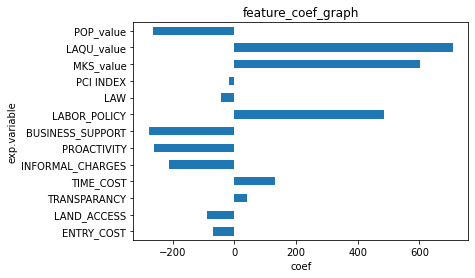

In [444]:
x_labels = list(final.columns[2:-1])
ax = beta.plot.barh() #다중 barplot 그리기
ax.set_title('feature_coef_graph') #타이틀 설정
ax.set_xlabel('coef') #x축 이름
ax.set_ylabel('exp.variable') #y축 이름
ax.set_yticklabels(x_labels)
plt.show()